# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The aim of this report is to analyze the TMDb movie dataset and draw some insights from the data. The main goal is to understand the data and answer the following questions:

-What is the relationship between adjusted revenue and adjusted budgets? Do higher budgets lead to higher revenue based on historical data?

-How has the runtime changed over the years and is a longer runtime a leading indicator to a higher adjusted revenue?

-Who are the top 10 directors based on adjusted revenue and how much revenue has each director brought in on average?

-Is there a relationship between how popular a movie is and the profit the movie generated?



In [4]:
#Import all libraries that will be used in the report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

The first step in my data analysis process is to load the data and print the first 5 rows to check for cleanliness and understand the type of data available for analysis.

### General Properties

In [52]:
# Load data and print first 5 lines
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [53]:
#Get an idea of the size and the number of columns of the data
df.shape

(10866, 21)

In [54]:
#Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [55]:
#Get a statistical snapshot of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking at the initial data, there are 21 columns in total. After reviewing the data not all columns will be useful for my analysis and therefore the next step remove the unnecessary columns, delete duplicate and NaN values. 

### Data Cleaning (Remove columns, duplicates and NaN values)

In [56]:
#Dropping the columns I am not going to use in my analysis
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)


In [57]:
#Check for duplicates
sum(df.duplicated())

1

In [58]:
#Remove the duplicate
df.drop_duplicates(inplace=True)

In [59]:
#Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [60]:
#Remove NaN values to address the missing values identified above
df.dropna(subset=['director'], inplace=True)  
df.dropna(subset=['genres'], inplace=True)
df.dropna(subset=['production_companies'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 14 columns):
popularity              9806 non-null float64
budget                  9806 non-null int64
revenue                 9806 non-null int64
original_title          9806 non-null object
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
release_date            9806 non-null object
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
budget_adj              9806 non-null float64
revenue_adj             9806 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [61]:
#Check to see if budget_adj or revenue_adj have any 0 values
df.loc[(df['budget_adj']==0) | (df['revenue_adj']==0)]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,3.358321,0,22354572,Solace,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,2.932340,30000000,0,Wild Card,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,2.331636,20000000,0,Survivor,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,2.272044,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
74,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.000000e+00
75,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.000000e+00
88,1.959765,0,2000000,Equals,Drake Doremus,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.000000e+00,1.839999e+06
92,1.876037,0,0,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.000000e+00
93,1.872696,10000000,0,Vice,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.000000e+00


In [94]:
#Remove the 0 values from budget_adj and revenue_adj
df = df[(df['budget_adj']!=0) & (df['revenue_adj']!=0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3807 non-null float64
budget                  3807 non-null int64
revenue                 3807 non-null int64
original_title          3807 non-null object
director                3807 non-null object
runtime                 3807 non-null int64
genres                  3807 non-null object
production_companies    3807 non-null object
release_date            3807 non-null object
vote_count              3807 non-null int64
vote_average            3807 non-null float64
release_year            3807 non-null int64
budget_adj              3807 non-null float64
revenue_adj             3807 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 446.1+ KB


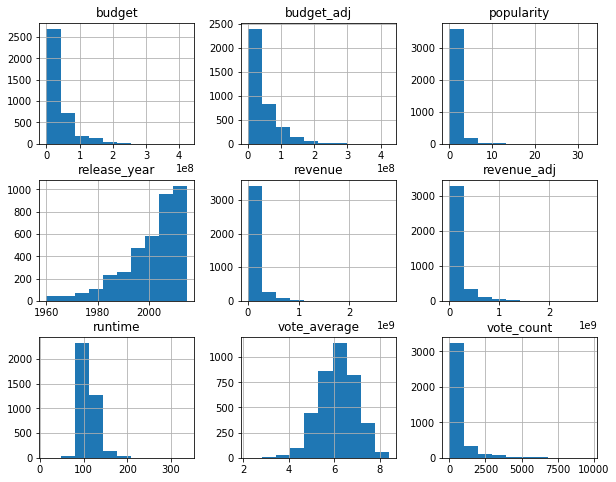

In [95]:
#Get a feel of the distribution of the data after the clean up
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is in good shape, I can start with the analytical piece of this project.

### Research Question 1: What is the relationship between adjusted revenue and adjusted budgets? Do higher budgets lead to higher revenue based on historical data?

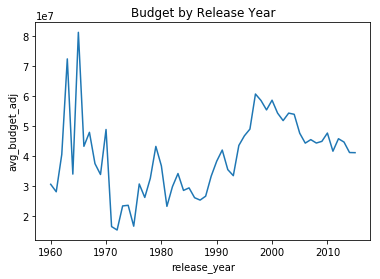

In [158]:
#How are budgets trending over time? Calculating the mean and vizualizing the amount spent over time
df.groupby('release_year').budget_adj.mean().plot(kind='line')
plt.xlabel("release_year")
plt.ylabel("avg_budget_adj")
plt.title("Budget by Release Year");

The adjusted average budget has increase sharply since the 1970s and peaked around 2000s. Then there was a slight drop starting in 2000's and continuing on to 2010. Looks like companies have been spending more on budgets on average since the 1970s but not as high as between 1960-1970s based on the adjusted numbers.


In [97]:
df.budget_adj.mean()

44697228.79796119

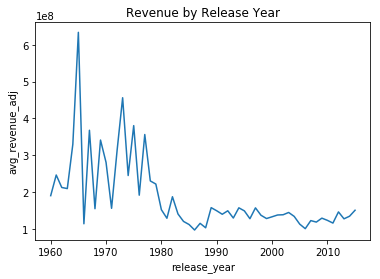

In [160]:
#How are revenue trending over time? Calculating the mean and vizualizing the amount earned over time
df.groupby('release_year').revenue_adj.mean().plot(kind='line')
plt.xlabel("release_year")
plt.ylabel("avg_revenue_adj")
plt.title("Revenue by Release Year");

Unlike adjusted budgets, adjusted revenues have gone down since 1980s. There was more volitility prior to 1980s and since the 1980s, the average adjusted revenue has been pretty fat year over year.

In [99]:
df.revenue_adj.mean()

138643066.09658808

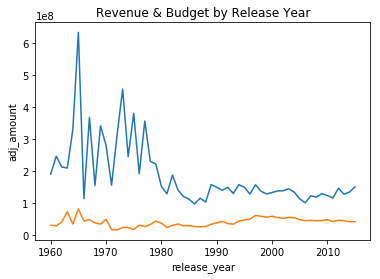

In [161]:
#Putting it all together, vizualizing the adjusted budget and revenue on the same line chart
df.groupby('release_year').revenue_adj.mean().plot(kind='line')
df.groupby('release_year').budget_adj.mean().plot(kind='line');
plt.xlabel("release_year")
plt.ylabel("adj_amount")
plt.title("Revenue & Budget by Release Year");

My initial intuition was that if budgets are going higher, the production companies are making more interesting and engaging movies leading to higher revenue. However the data point to the opposite conclusion, revenues are declining despite the higher budgets. 



### Research Question 2: How has the runtime changed over the years and is a longer runtime leading to higher adjusted revenue?

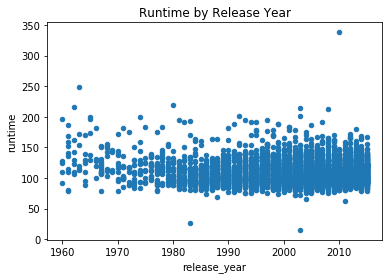

In [162]:
#Scatter plot of runtime and release year
df.plot(x='release_year', y='runtime', kind='scatter')
plt.title("Runtime by Release Year");

Runtime has changed over the years, there are more longer movies past the 1990s but also shorter runtimes have increased as well. The data points to more consistent runtimes from 19060 - 1990 (less scattered data) and from 1990s the variety of runtimes has changed (the data os more scattered).


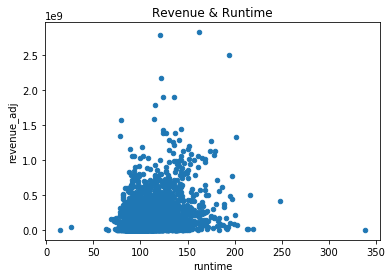

In [163]:
#Scatter plot of runtime and adjusted revenue
df.plot(x='runtime', y='revenue_adj', kind='scatter')
plt.title("Revenue & Runtime");

There seems to be a sweet spot when it comes to runtime and revenue. Anything over 150 and below 70 runtime won't earn you much. The highest revenue come from movies around 100 runtime.


In [104]:
#Stats on runtime
df.runtime.describe()

count    3807.000000
mean      109.350932
std        19.845761
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

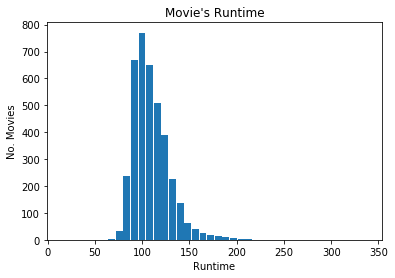

In [105]:
#Distribution of movie runtime
plt.hist(df['runtime'], bins = 40, rwidth = 0.9)
plt.title("Movie's Runtime")
plt.xlabel("Runtime")
plt.ylabel("No. Movies");



Most movies produced are around the 100s runtimes with very few movies produced below 70 runtime and over 150.


### Research Question 3: Who are the top 10 directors based on adjusted revenue and how much revenue has each director brought in on average?

In [107]:
#Calculating the total revenue adjusted by the top 10 directors
df.groupby('director').sum().revenue_adj.nlargest(10)

director
Steven Spielberg     1.520245e+10
James Cameron        7.327221e+09
Peter Jackson        7.019848e+09
George Lucas         6.313919e+09
Robert Zemeckis      5.655648e+09
Michael Bay          5.460672e+09
Chris Columbus       4.893486e+09
Tim Burton           4.529285e+09
David Yates          4.177455e+09
Christopher Nolan    4.164262e+09
Name: revenue_adj, dtype: float64

The top director in terms of total revenue is James Cameron followed by Peter Jackson and George Lucas. 


### Research Question 4: Is there a relationship between how popular a movie is and the profit the movie generated?

In order to examine the relationship between populaity and profit, we need to first calculate and add a column in the data for profit. By definition profit is the difference between revenue and cost. In our example profit will be defined as revenue_adj - budget_adj.

In [153]:
#Computing profit and adding a column in the data
if 'profit' not in df:
    df.insert(14, 'profit', df['revenue_adj'] - df['budget_adj'])

In [112]:
#Confirming the profit data is added at the end of the data set, next to revenue_adj
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [120]:
#Defining the correlation function
def corr(data1, data2):
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()

    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

In [121]:
corr(df['popularity'], df['profit'])

0.26747187892396346

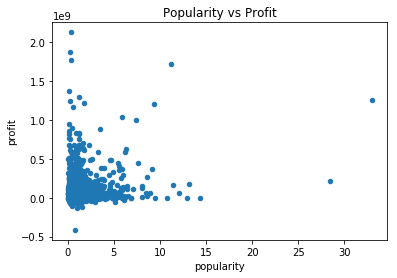

In [164]:
#Scatter plot of popularity and profit
df.plot(x='popularity', y='profit', kind='scatter')
plt.title("Popularity vs Profit");

There seems to be week positive correlation between popularity and profit, which means the higher the popularity the more profit the movie will generate.

In [127]:
corr(df['popularity'], df['revenue_adj'])

0.5447274310136603

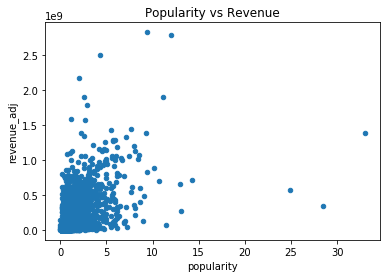

In [165]:
#Scatter plot of popularity and revenue_adj
df.plot(x='popularity', y='revenue_adj', kind='scatter')
plt.title("Popularity vs Revenue");

The correlation between popularity and reveneu_adj is 0.55, which is an indicator of a stronger positive relationship between the two variables. As popularity increases, the revenue adjusted would follow and increase as well.

In [129]:
corr(df['popularity'], df['budget_adj'])

0.39544086516077015

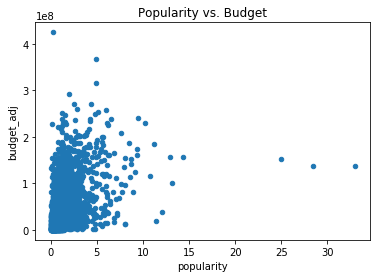

In [166]:
#Scatter plot of popularity and budget_adj
df.plot(x='popularity', y='budget_adj', kind='scatter')
plt.title("Popularity vs. Budget");

The correlation between popularity and budget_adj is not as strong as revenue_adj but still there is a moderate positive correlation between the two variables.

<a id='conclusions'></a>
## Conclusions

The above outlined analysis points to the following insights:
    
    A higher budget does not necessarily guarantees a higher return on investment (revenue). There has been an increased in the budgets spent on movies from 1990s to 2010. Adjusted revenues however moved in the opposite direction, there is a decline in 1980s compared to the previous years. 
    
    There is a sweet spot when it comes to runtime and revenue, which is around 100 minutes. Anything below 70 or above 200 runtime minutes won't bring much of a return.
    
    The top 3 directors in terms of total revenues James Cameron, Peter Jackson and George Lucas. 
    
Limitations of the analysis:

    There is no data on the overall health of the economy to examine the impact on the budgets and revenue. Do revenues increase in a healthy economy regardless of other factors since people have more discretional income to spend?
    
    There is also no data on demographics of the audience. I would be curious to see how each variable examined above performed under the different demographics breakdown.